# <span style="color:blue">Programação Python para Ciência de Dados</span>
## <span style="color:blue">Aula 4: Numpy parte II, Matplotlib, Pandas parte II</span>
---

## Numpy e Matplotlib:
### Numpy - Parte II
- *"Broadcasting"* (extensão) e funções aritmétricas
- Comparação
- Operações avançadas

__References:__<br>
[https://www.datacamp.com/community/tutorials/python-numpy-tutorial](https://www.datacamp.com/community/tutorials/python-numpy-tutorial)

### Matplotlib
- Introdução
- Componentes
- Texto
- Anotações
- Legendas
- Outros plots

__Referencias:__<br>
[https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python](https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python)<br>
[http://matplotlib.org/Matplotlib.pdf](http://matplotlib.org/Matplotlib.pdf)

### Pandas - Parte II
- Caregando arquivos
- Dados faltantes
- Processamento
- Agrupar e remodelar
- Estatísticas
- Dados categóricos
- Criação de gráficos
- Aplicar funções

__Referências__ <br>
- [Pandas: powerful Python data analysis toolkit: Wes McKinney & PyData Devel. Team](https://pandas.pydata.org/pandas-docs/stable/pandas.pdf)
- [http://pandas.pydata.org/pandas-docs/stable/index.html](http://pandas.pydata.org/pandas-docs/stable/index.html)

---
## Numpy - Parte II

### *"Broadcasting"*
- Operações básica em arrays (soma, multiplicação, etc) são feitas elemento por elemento (*"element-wise"*)
- Essas operações funcionam em arrays com mesma dimensão
- __Broadcasting__ é um mecanismo para realizar operações em arrays com dimensões diferentes
  - Ele transforma os arrays de modo que todos tenham a mesma dimensão

#### Broadcasting por um escalar
Utilizado em operações que envolvam um array e um escalar.

In [2]:
import numpy as np

# Cria uma matriz 5x5 com números aleatórios
A = np.arange(25).reshape(5,5)

# define um escalar
s = 5

# O opeador "+" é aplicado elemento por elemento (caso contrário não seria definido)
B = s + A

print(A)
print(B)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
[[ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]]


Quando somamos um escalar a um array, o numpy primeiro replica o escalar em um array com o mesma dimensão do array envolvido na operação - no examplo acima, 5x5

$$
B = s + A = \left[\begin{array}{ccccc}
5 & 5 & 5 & 5 & 5\\
5 & 5 & 5 & 5 & 5\\
5 & 5 & 5 & 5 & 5\\
5 & 5 & 5 & 5 & 5\\
5 & 5 & 5 & 5 & 5
\end{array}\right] + 
\left[\begin{array}{ccccc} 
0  & 1 & 2 & 3 & 4 \\
5  & 6 & 7 & 8 & 9\\
10 & 11 & 12 & 13 & 14\\
15 & 16 & 17 & 18 & 19\\
20 & 21 & 22 & 23 & 24
\end{array}\right]
$$

#### Broadcasting em arrays
    Broadcasting tambem é aplicado quando operações são aplicadas em pares de arrays, porém algumas restrições devem ser respeitadas:
- Os dois arryas devem possuir dimensões compatíveis:
  - As dimensões devem ser compatíveis em algum(s) dos eixos, sendo os demais com dimensão 1
- O broadcasting é então aplicado nos eixos com dimensão 1

In [17]:
A = np.arange(25).reshape(5,5)
print(A.shape)

v = np.arange(5)
print(v.shape)

# A operação de "*" é feita elemento por elemento, broadcasting o array "v" 
# A segunda dimensão não é especificada então "v" é considerado um array com uma dimensão
B = v * A

print(v,'\n')
print(A,'\n')
print(B)

(5, 5)
(5,)
[0 1 2 3 4] 

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]] 

[[ 0  1  4  9 16]
 [ 0  6 14 24 36]
 [ 0 11 24 39 56]
 [ 0 16 34 54 76]
 [ 0 21 44 69 96]]


$$
B = v * A 
$$

$$
\downarrow
$$

$$
\left[\begin{array}{ccccc}
0  & 1 & 2 & 3 & 4
\end{array}\right] * 
\left[\begin{array}{ccccc} 
0  & 1 & 2 & 3 & 4 \\
5  & 6 & 7 & 8 & 9\\
10 & 11 & 12 & 13 & 14\\
15 & 16 & 17 & 18 & 19\\
20 & 21 & 22 & 23 & 24
\end{array}\right] 
$$

$$
\downarrow
$$

$$
\left[\begin{array}{ccccc}
0  & 1 & 2 & 3 & 4\\
0  & 1 & 2 & 3 & 4\\
0  & 1 & 2 & 3 & 4\\
0  & 1 & 2 & 3 & 4\\
0  & 1 & 2 & 3 & 4
\end{array}\right] * 
\left[\begin{array}{ccccc} 
0  & 1 & 2 & 3 & 4 \\
5  & 6 & 7 & 8 & 9\\
10 & 11 & 12 & 13 & 14\\
15 & 16 & 17 & 18 & 19\\
20 & 21 & 22 & 23 & 24
\end{array}\right]
$$

__Cuidado__: A operação `*` corresponde a uma multiplicação elemento por elemento, e não uma multiplicação matricial.

In [18]:
A = np.arange(25).reshape(5,5)
print(A.shape)

v = np.arange(5).reshape(5,1)
print(v.shape)

# A operação "*" é feita elemento por elemento, broadcasting v primeiro
# Agora "v" é um vetor coluna
B =  v * A

print(v,'\n')
print(A,'\n')
print(B)

(5, 5)
(5, 1)
[[0]
 [1]
 [2]
 [3]
 [4]] 

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]] 

[[ 0  0  0  0  0]
 [ 5  6  7  8  9]
 [20 22 24 26 28]
 [45 48 51 54 57]
 [80 84 88 92 96]]


Broadcasting também é feito automaticamente quando os dois operandos são arrays unidimensionais

In [19]:
v = np.arange(5)
print(v.shape)

w = np.arange(3).reshape(3,1)
print(w.shape)

# A operação "+" é feita elemento por elemento, broadcasting "v" e "w" simultaneamente
# Neste caso "W" é um vetor coluna e "v" é tratado como vetor linha
Z =  v + w

print(v,'\n')
print(w,'\n')
print(Z)

(5,)
(3, 1)
[0 1 2 3 4] 

[[0]
 [1]
 [2]] 

[[0 1 2 3 4]
 [1 2 3 4 5]
 [2 3 4 5 6]]


$$
Z = v + w
$$

$$
\downarrow
$$

$$
\left[\begin{array}{ccccc}
0  & 1 & 2 & 3 & 4
\end{array}\right] + 
\left[\begin{array}{c} 
0  \\
1 \\
2
\end{array}\right] 
$$

$$
\downarrow
$$

$$
\left[\begin{array}{ccccc}
0  & 1 & 2 & 3 & 4\\
0  & 1 & 2 & 3 & 4\\
0  & 1 & 2 & 3 & 4
\end{array}\right] + 
\left[\begin{array}{ccccc} 
0 & 0 & 0 & 0 & 0 \\
1 & 1 & 1 & 1 & 1\\
2 & 2 & 2 & 2 & 2
\end{array}\right]
$$

Broadcasting também é usado em atribuiçoes

In [6]:
A = np.zeros((5,3))
v = np.arange(5)
print(v)

# o atributo np.newaxis transform v em um vetor coluna
A[:] = v[:,np.newaxis]
print(A)

A[:3] = [[-1],[-2],[-3]]
#A[:3] = [-1,-2,-3]
print(A)

[0 1 2 3 4]
[[0. 0. 0.]
 [1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]
 [4. 4. 4.]]
[[-1. -1. -1.]
 [-2. -2. -2.]
 [-3. -3. -3.]
 [ 3.  3.  3.]
 [ 4.  4.  4.]]


### Comparações
Comparações usando `==`, `>`,`<`,`>=`,`<=`, e `!=` também são feitas elemento por elemento.

In [37]:
A = np.arange(4).reshape(2,2)
B = np.arange(6,2,-1).reshape(2,2)

M = B > A

print(A,'\n')
print(B,'\n')

[[0 1]
 [2 3]] 

[[6 5]
 [4 3]] 

[[ True  True]
 [ True False]]


Comparações com um array devem ser feitas utilizando o método `array_equal` do numpy.

In [21]:
A = np.arange(4).reshape(2,2)
B = np.arange(6,2,-1).reshape(2,2)
C = A[:]

# A resposta é apenas um valor booleano
print(np.array_equal(A,B))
print(np.array_equal(A,C))

False
True


### Reduções
Funções de redução como  `sum`, `max`, `min`, `argmax` e `argmin` podem ser aplicadas ao array inteiro, às linhas, ou colunas.

In [26]:
np.sum(A)

50.0

In [7]:
A = np.zeros((5,5))
A[:] = np.arange(5)
print(A,'\n')

print(np.sum(A)) # todos os elementos
print(np.sum(A,axis=0)) # por coluna
print(np.sum(A,axis=1)) # por linha

[[0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]] 

50.0
[ 0.  5. 10. 15. 20.]
[10. 10. 10. 10. 10.]


In [9]:
A = np.random.randint(low=0,high=30,size=(5,5)).astype(float)
print(A,'\n')

# todos os elementos
print(np.max(A))  
print(np.argmax(A))

# Por coluna
print(np.max(A,axis=0))
print(np.argmax(A,axis=0))

[[ 9. 21.  9. 13. 14.]
 [25.  8. 23. 10. 16.]
 [19. 27. 17. 24. 13.]
 [19. 27. 12. 20.  4.]
 [ 4. 12. 24. 27. 23.]] 

27.0
11
[25. 27. 24. 27. 23.]
[1 2 4 4 4]


Reduções estatísticas como `mean`, `median` e `std` funcionam da mesma forma.

In [10]:
A = np.random.randint(low=0,high=30,size=(5,5)).astype(float)
print(A,'\n')

print(np.mean(A))
print(np.mean(A,axis=0))
print(np.mean(A,axis=1))

[[ 2. 25. 19.  8.  3.]
 [17.  6.  0. 17.  5.]
 [23.  5. 10. 27.  9.]
 [17.  6. 20. 16.  6.]
 [25. 13. 12.  8. 28.]] 

13.08
[16.8 11.  12.2 15.2 10.2]
[11.4  9.  14.8 13.  17.2]


#### Redução lógica
- `all` - se todos os elementos  do array satisfazem a condição (True)
- `any` - se qualquer elementos  do array satisfazem a condição (True)

In [32]:
A = np.arange(25)

M1 = A >= 0
M2 = A > 10
M3 = A > 25

print(np.all(M1))
print(np.all(M2))
print(np.any(M2))
print(np.any(M3))

True
False
True
False


### Ordenação 
A ordenação de um array pode ser feita diretamente nele mesmo (inplace) ou numa cópia (sem modificação do original).
- Por padrão ordena por coluna
- Ordena por linh se axis = 0

In [11]:
A = np.random.randint(low=0,high=30,size=(5,5)).astype(float)
print(A,'\n')

B = np.sort(A)
A.sort(axis=0)

print(A,'\n\n')
print(B)

[[26.  5. 27. 11. 12.]
 [19. 13. 13. 19. 16.]
 [23.  9. 26. 12. 12.]
 [ 9. 29. 19. 14. 13.]
 [16. 25. 27. 26.  3.]] 

[[ 9.  5. 13. 11.  3.]
 [16.  9. 19. 12. 12.]
 [19. 13. 26. 14. 12.]
 [23. 25. 27. 19. 13.]
 [26. 29. 27. 26. 16.]] 


[[ 5. 11. 12. 26. 27.]
 [13. 13. 16. 19. 19.]
 [ 9. 12. 12. 23. 26.]
 [ 9. 13. 14. 19. 29.]
 [ 3. 16. 25. 26. 27.]]


`argsort` retorna um vetor de indícies que ordena o vetor original.

In [35]:
A = np.random.randint(low=0,high=30,size=(5,5)).astype(float)
print(A,'\n')

I = np.argsort(A)
print(I,'\n')

[[25. 27.  1. 20.  1.]
 [13.  5. 14.  3.  5.]
 [10.  9. 13.  6.  6.]
 [28. 20. 13. 16. 22.]
 [ 1.  8. 28. 22. 29.]] 

[[2 4 3 0 1]
 [3 1 4 0 2]
 [3 4 1 0 2]
 [2 3 1 4 0]
 [0 1 3 2 4]] 



### Aritmétrica vetorial e matricial
A multiplicação matriz e vetor (ou matriz e matriz) comumente empregada no contexto de sistemas lineares é feita utilizando o método `dot`.
- As dimensões devem ser compatíveis
- resultado diferente de `*` 

$$
b1 = \left[\begin{array}{cc}
           1 & 1 \\
           2 & 2
    \end{array}\right]\cdot
    \left[\begin{array}{c}
           1  \\
           2 
    \end{array}\right] = \left[\begin{array}{c}
           3  \\
           6 
    \end{array}\right]
$$

$$
b2 = \left[\begin{array}{cc}
           1 & 2 
    \end{array}\right]\cdot
\left[\begin{array}{cc}
           1 & 1 \\
           2 & 2
    \end{array}\right]\cdot
     = \left[\begin{array}{cc}
           5 & 5
    \end{array}\right]
$$

In [36]:
A = np.zeros((2,2))
A[:] = [[1],[2]]
v = np.array([1,2]).reshape(2,1)

print(A.shape)
print(v.shape)

b1 = np.dot(A,v)   # v e b1 são vetores colunas 
print(b1,b1.shape)

# np.dot(v,A) não é definido pois as dimensões não são compatíveis (tente e dará um erro)
# mas podemos transpor v
b2 = np.dot(v.T,A) # v.T é um vetor linha, assim como b2
print(b2,b2.shape)

(2, 2)
(2, 1)
[[3.]
 [6.]] (2, 1)
[[5. 5.]] (1, 2)


## Muito mais...
- `numpy.linalg` biblioteca de algebra linear
   - resolução de sistema
   - decomposição em eigen vetores
- numpy.polynomial
   - aritmétrica polynomial
   - estimativa polynomial 
   - interpolação polynomial
- numpy.fft
   - transformação de Fourier 
- ...


---
## Matplotlib
###  Introdução
```python
import matplotlib.pyplot as plt  
```
- Utiliza NumPy para garantir um bom desempenho
- Supõe que os dados são arrays do numpy. Se lista normais forem utilizadas, elas são convertidas para numpy array internamente.

### Plot
Reazila um plot simples<br>
Regular function plot
- supõe valores discretos para os eixos x e y
    - se apenas um array é utilizado, supõe que x representa inteiros igualmente espaçados
- possui diversos argumentos que personalizam o estilo do plot
    - [https://matplotlib.org/users/pyplot_tutorial.html](https://matplotlib.org/users/pyplot_tutorial.html)

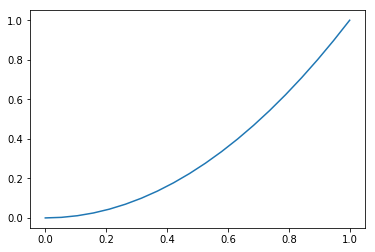

In [37]:
import numpy as np
import matplotlib.pyplot as plt
# mantem os gráficos como parte do notebook
%matplotlib inline  

x = np.linspace(0,1,20)
y = x**2
plt.plot(x,y)

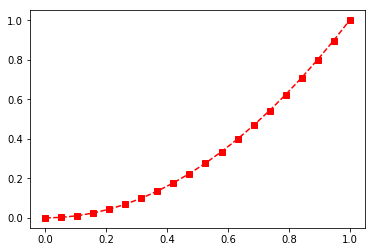

In [8]:
#plt.plot(x,y,color='red',linewidth = 5, linestyle = '--')
#plt.plot(x,y,color='red', linestyle = '-',marker='s')
plt.plot(x,y,'r--s')

[None, None, None]

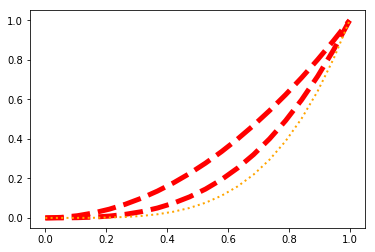

In [38]:
line_2_3 = plt.plot(x,y,x,x**3) # mais de 1 plot simultaneamente
plt.setp(line_2_3,color='red',linewidth = 5, linestyle = '--')
line_4 = plt.plot(x,x**4) # mais de 1 plot simultaneamente
plt.setp(line_4,color='orange',linewidth = 2, linestyle = ':')

### Componentes da Figura (baixe plt_components.png)
<img src="plt_components.png" width="200" height="200">

- Um __axes__ é o que geralmente imaginamos como um "plot". Podem haver vários axes em uma figura.
- Um __axis__ é um objeto que define os limites do gráfico e mostra os __ticks__ e seus valores. Existem sempre 2 axis em um axes.

### Figuras e Axes
- Matplotlib tem o conceito de uma figura e um axes atual
- Muito dos comandos do matplotlib operam na figura/axes atual (como plot())
- A função __gca()__ retorna o axes atual, a __sca()__ especifica o axes atual e a  __cla()__ limpa o axes atual
- A função __gcf()__ retorna a figura atual, a __figure()__ especifica a figura atual ou cria uma nova (ela recebe um número como parâmetro) e a __clf()__ limpa a figura atual 
- Uma figura e axes iniciais são criados automaticamente

### Subplots
- subplot é outro nome para __axes__
- __subplot()__ cria novos axes e organiza-os em um grid de acordo com os argumentos
- Os parâmetros do Subplot são `num_rows`, `num_cols`, and `subplot_number`
- Se quiser especificar o __axes__ manualmente (não organizado como um grid) utilize funções para especifica _left_, _bottom_, _width_, _height_

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def f(t):
    return(np.exp(-t) * np.cos(2.0*np.pi*t))

t1 = np.linspace(0.0, 5.0, 50)
t2 = np.linspace(0.0, 5.0, 100)

plt.figure(1) # redundante
plt.subplot(2, 1, 1)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(2, 1, 2)
plt.plot(t2, np.cos(2.0*np.pi*t2), 'r--')

### Texto
- Texto pode ser adicionado em qualquer localização da figura, ou nos axes
- Características podem ser customizadas através de keyword arguments ou utilizando __setp()__ 
- Os seguintes comandos são úteis para incluir texto nos plots:
    - text() - adiciona texto aos axes numa localazição aleátoria dos axes
    - xlabel() - adiciona um rótulo ao eixo x
    - ylabel() - adiciona um rótulo ao eixo y
    - title() - adiciona um título aos axes
    - figtext() - adiciona texto à figura  numa localazição aleátoria 
    - suptitle() - adiciona um título à figura
    - annotate() - adiciona uma anotação (com uma seta opcional) aos axes
- Várias [outras propriedades](https://matplotlib.org/api/text_api.html)

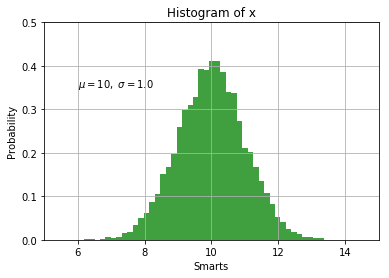

In [13]:
import numpy as np
import matplotlib.pyplot as plt

mu, sigma = 10.0, 1.0
x = np.random.normal(mu,sigma,size=10000)

# gera um histograma de x
plt.hist(x,50,density=1,facecolor='g',alpha=0.75)
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of x')

# posiciona o texto usando fontes do latex 
plt.text(6.0, 0.35, r'$\mu=10,\ \sigma=1.0$')
# limita a extensão de x e y
plt.axis([5, 15, 0, 0.5])

# coloca uma grade no fundo
plt.grid(True)

Text(3, 1.3, 'local max')

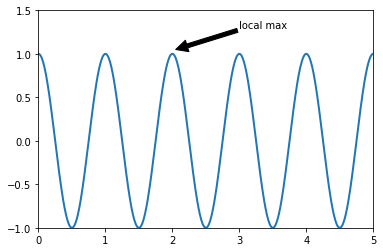

In [14]:
import numpy as np
import matplotlib.pyplot as plt

ax = plt.subplot(111)
t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)
plt.axis([0.0, 5.0, -1.0, 1.5])

plt.annotate('local max', xy=(2.05,1.05), xytext=(3,1.3), 
             arrowprops=dict(facecolor='black'))

### Legenda

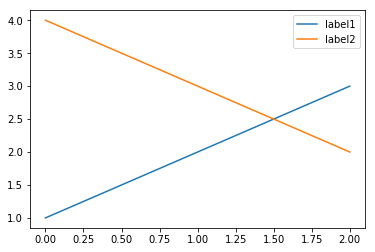

In [15]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot([1,2,3], label="label1")
plt.plot([4,3,2], label="label2")

plt.legend()

__Outros plots úteis:__
- bar()
- scatter()
- stackplot()
- matshow()

[Mais informações](https://realpython.com/python-matplotlib-guide/)

---



<br>
<br>



##  <span style="color:blue">Pandas - Part II</span>

## Relembrando
__Series__
- Objeto similar a um array unidimensional, contendo dados e rótulos (indice de linhas)

__DataFrame__
- Similar a uma planilha, conjunto ordenado de colunas
- Pode ser considerado um dicionário de Series (colunas), onde todas as Series compartilham o mesmo indice de linhas

## Carregando arquivos
Pandas permite diversas maneiras de carregas arquivos, como vimos na última aula:
- Arquivos de texto
- Dados estruturados (JSON, XML, HTML, CSV)
- Excel (depende das biblitoecas xlrd e  openpyxl)
- Direto de base de dados
  - pandas.io.sql module (read_frame)

In [17]:
%%writefile simple.csv
a,b,c,d,message
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo

Writing simple.csv


In [18]:
# Carregar um CSV simples
import pandas as pd # importamos a bilbioteca

# a primeira linah vira os índices das colunas
df = pd.read_csv('simple.csv')
print(df.columns.values)
df.head()

['a' 'b' 'c' 'd' 'message']


,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


`read_csv` Suporta muitos outros parâmetros

[https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

In [45]:
# uma coluna pode virar o índice das linhas;
# podemos também dar nomes as colunas
df = pd.read_csv('simple.csv',
                 names=['c0','c1','c2','c3','c4'],
                 index_col='c4')
#df = pd.read_csv('simple.csv',index_col='c5')
print(df.index.values)
df.head()

['message' 'hello' 'world' 'foo']


,c0,c1,c2,c3
c4,,,,
message,a,b,c,d
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


## Dados faltantes
Pandas fornece diversas funcionalidades para lidar com dados faltantes:
- detectar dados faltantes com isnull e notnull
- remoção de linhas usando dropna
   - linhas faltando qualquer dado 
   - linhas faltando todos os dados
   - linhas faltando um número específico de dados
- Substituir NaN com um valor específico usando fillna
- Especificar valores de substituição quando utilizando funções aritmétricas

In [10]:
%%writefile missing.csv
Colorado,,,,
Ohio,3,5,6,
Oregon,,,,
Texas,9,12,,
Utah,,,,

Overwriting missing.csv


In [11]:
df = pd.read_csv('missing.csv',header=None)
print(df)

          0    1     2    3   4
0  Colorado  NaN   NaN  NaN NaN
1      Ohio  3.0   5.0  6.0 NaN
2    Oregon  NaN   NaN  NaN NaN
3     Texas  9.0  12.0  NaN NaN
4      Utah  NaN   NaN  NaN NaN


In [24]:
# encontrar dados faltantes
print(df.isnull())

       0      1      2      3     4
0  False   True   True   True  True
1  False  False  False  False  True
2  False   True   True   True  True
3  False  False  False   True  True
4  False   True   True   True  True


In [25]:
# remove linhas com pelo menos 1 dado faltando
print(df.dropna())

Empty DataFrame
Columns: [0, 1, 2, 3, 4]
Index: []


In [12]:
# remove linhas com todos os dados faltando
print(df.dropna(how='all'))

print(5*'-')
# remove colunas com todos os dados faltando
print(df.dropna(how='all',axis=1))

          0    1     2    3   4
0  Colorado  NaN   NaN  NaN NaN
1      Ohio  3.0   5.0  6.0 NaN
2    Oregon  NaN   NaN  NaN NaN
3     Texas  9.0  12.0  NaN NaN
4      Utah  NaN   NaN  NaN NaN
-----
          0    1     2    3
0  Colorado  NaN   NaN  NaN
1      Ohio  3.0   5.0  6.0
2    Oregon  NaN   NaN  NaN
3     Texas  9.0  12.0  NaN
4      Utah  NaN   NaN  NaN


In [27]:
# remove linhas com k+1 dados faltando
print(df.dropna(thresh=2))

       0    1     2    3   4
1   Ohio  3.0   5.0  6.0 NaN
3  Texas  9.0  12.0  NaN NaN


In [13]:
# Substitui valores faltantes
print(df.fillna(0))

print(5*'-')
# Substitui valores faltantes com um valor diferente por coluna
print(df.fillna({1:-1,3:0,4:1}))

          0    1     2    3    4
0  Colorado  0.0   0.0  0.0  0.0
1      Ohio  3.0   5.0  6.0  0.0
2    Oregon  0.0   0.0  0.0  0.0
3     Texas  9.0  12.0  0.0  0.0
4      Utah  0.0   0.0  0.0  0.0
-----
          0    1     2    3    4
0  Colorado -1.0   NaN  0.0  1.0
1      Ohio  3.0   5.0  6.0  1.0
2    Oregon -1.0   NaN  0.0  1.0
3     Texas  9.0  12.0  0.0  1.0
4      Utah -1.0   NaN  0.0  1.0


In [14]:
# Substitui valores faltantes com uma média
print(df.fillna(df.mean(axis=0)))

          0    1     2    3   4
0  Colorado  6.0   8.5  6.0 NaN
1      Ohio  3.0   5.0  6.0 NaN
2    Oregon  6.0   8.5  6.0 NaN
3     Texas  9.0  12.0  6.0 NaN
4      Utah  6.0   8.5  6.0 NaN


## Processando os dados

- Encontar e remover linhas duplicadas
   - usar `duplicated` e `drop_duplicates`
- Transformar valores
   - Usar `map` para transformar valores ou adicionar colunas
- Substituir valores
   - Usar `replace` para substituir um valor específico ou utilizar uma expressão regular
- Renomear os índices
   - Usar `rename` para mudar os índices das linhas ou colunas

#### Linhas duplicadas

In [40]:
%%writefile duplicate.csv
c0,c1
one,1
one,1
one,2
two,3
two,3
two,4
two,4

Writing duplicate.csv


In [16]:
df = pd.read_csv('duplicate.csv')

In [18]:
# detectar linhas duplicadas
print(df.duplicated())

print(5*'-')
# remover linhas duplicadas
print(df.drop_duplicates())

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool
-----
    c0  c1
0  one   1
2  one   2
3  two   3
5  two   4


### Método `map`

#### Transformando valores

In [17]:
dt = {'food': ['Bread','Apple','Cheese'],
      'ounces': [4,3,12],
      'type':['grain','fruit','dairy']
     }
df = pd.DataFrame(dt)
print(df)

     food  ounces   type
0   Bread       4  grain
1   Apple       3  fruit
2  Cheese      12  dairy


#### Criando colunas com base em outra coluna

In [18]:
# transformar os dados
df['food'] = df['food'].map(lambda x : x.upper())
print(df)

print(5*'-')
# criar uma coluna nova a partir de outra
calories_by_type = {'grain':'low','fruit':'low','dairy':'high'}
df['calories'] = df['type'].map(calories_by_type)
print(df)

     food  ounces   type
0   BREAD       4  grain
1   APPLE       3  fruit
2  CHEESE      12  dairy
-----
     food  ounces   type calories
0   BREAD       4  grain      low
1   APPLE       3  fruit      low
2  CHEESE      12  dairy     high


### Método `replace`

#### Substituindo valores

In [21]:
dfr = pd.DataFrame({'c1':[1,2,3,4,5],'c2':[2,4,6,8,10],'c3':['bla','cla','dla','ela','fla'],
                   'c4':['cla','bla','fla','ela','dla']})
dfr

,c1,c2,c3,c4
0,1,2,bla,cla
1,2,4,cla,bla
2,3,6,dla,fla
3,4,8,ela,ela
4,5,10,fla,dla


In [23]:
# substitui valores em todo dataframe
print(dfr.replace([2,'cla'],[-2,'clam']))

   c1  c2    c3    c4
0   1  -2   bla  clam
1  -2   4  clam   bla
2   3   6   dla   fla
3   4   8   ela   ela
4   5  10   fla   dla


In [24]:
# substitui baseado em um dicionario em todo dataframe
print(dfr.replace({4:-4,'fla':'palm'}))

   c1  c2    c3    c4
0   1   2   bla   cla
1   2  -4   cla   bla
2   3   6   dla  palm
3  -4   8   ela   ela
4   5  10  palm   dla


In [30]:
# substitui valores em colunas específicas
print(dfr.replace({'c1':4,'c3':'ela'},value=-4))

print(5*'-')
# especificando valores diferentes em cada coluna
print(dfr.replace({'c1':{4:-4},'c3':{'ela':'eles'}}))

   c1  c2   c3   c4
0   1   2  bla  cla
1   2   4  cla  bla
2   3   6  dla  fla
3  -4   8   -4  ela
4   5  10  fla  dla
-----
   c1  c2    c3   c4
0   1   2   bla  cla
1   2   4   cla  bla
2   3   6   dla  fla
3  -4   8  eles  ela
4   5  10   fla  dla


#### Renomeando índices

In [32]:
# `rename` pode ser utilizado para renomear índices de linhas ou colunas
df = pd.read_csv('simple.csv')
print(df)

print(5*'-')
print(df.rename(index=lambda x: str(x)+'a', columns=lambda x: x.upper()))

   a   b   c   d message
0  1   2   3   4   hello
1  5   6   7   8   world
2  9  10  11  12     foo
-----
    A   B   C   D MESSAGE
0a  1   2   3   4   hello
1a  5   6   7   8   world
2a  9  10  11  12     foo


## Combinando e transformando
- A operação de _Merge_ combina dados vinculando linhas por uma ou mais chave
- A operação _Concatenate_ combina dados a partir de um eixo específico
- _Reshaping_ é utilizado para transformar as linhas/colunas e realizar análises diferentes

#### Merge (fundir)
- Merge um-para-muitos (interseção padrão)
- Merge utilizando várias chaves
- Merge utilizando o index de um DataFrame como chave
- Merge utilizando índices dos dois DataFrame
- Também existe o método join para merge por index

In [33]:
df1 = pd.DataFrame({'key': ['b','b','a','c','a','a','b'], 
                   'data1': range(7)})

df2 = pd.DataFrame({'key': ['a','b','d','b'], 
                   'data2': range(4)})

print(df1)
print(df2)

  key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   a      5
6   b      6
  key  data2
0   a      0
1   b      1
2   d      2
3   b      3


In [36]:
# merge baseado em uma coluna (por intersecção, o comportamento padrão)
print(pd.merge(df1,df2,on='key'))

  key  data1  data2
0   b      0      1
1   b      0      3
2   b      1      1
3   b      1      3
4   b      6      1
5   b      6      3
6   a      2      0
7   a      4      0
8   a      5      0


In [37]:
# Outras maneiras podem ser realizadas através do parâmetro "how"
# how = 'outer' --> união entre os dados
# how = 'inner' --> intersecção entre os dados

print(pd.merge(df1,df2,on='key',how='outer'))

   key  data1  data2
0    b    0.0    1.0
1    b    0.0    3.0
2    b    1.0    1.0
3    b    1.0    3.0
4    b    6.0    1.0
5    b    6.0    3.0
6    a    2.0    0.0
7    a    4.0    0.0
8    a    5.0    0.0
9    c    3.0    NaN
10   d    NaN    2.0


In [41]:
# merge utilizando coluna e index
df1 = pd.DataFrame({'key': ['a','b','a','a','b','c'], 'value': range(6)})

df2 = pd.DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])

print(df1)
print(df2)

print(5*'-')
print(pd.merge(df1, df2, left_on='key', right_index=True,how='outer'))

  key  value
0   a      0
1   b      1
2   a      2
3   a      3
4   b      4
5   c      5
   group_val
a        3.5
b        7.0
-----
  key  value  group_val
0   a      0        3.5
2   a      2        3.5
3   a      3        3.5
1   b      1        7.0
4   b      4        7.0
5   c      5        NaN


In [42]:
# merge utilizando índices dos dois DataFrames
df1 = pd.DataFrame([[1,2],[3,4],[5,6]], 
        index=['a','c','e'], columns=['Ohio','Nevada'])

df2 = pd.DataFrame([[7,8],[9,10],[11,12],[13,14]], 
        index=['b','c','d','e'],
        columns=['Missouri','Alabama'])

print(df1)
print(df2)

print(5*'-')
print(pd.merge(df1, df2, left_index=True, 
        right_index=True, how='outer'))

   Ohio  Nevada
a     1       2
c     3       4
e     5       6
   Missouri  Alabama
b         7        8
c         9       10
d        11       12
e        13       14
-----
   Ohio  Nevada  Missouri  Alabama
a   1.0     2.0       NaN      NaN
b   NaN     NaN       7.0      8.0
c   3.0     4.0       9.0     10.0
d   NaN     NaN      11.0     12.0
e   5.0     6.0      13.0     14.0


#### Concatenação
- Combinar dados utilizando um eixo
   - Por padrão, concatena por linhas (axis = 0)
- Concatenar Series por coluna (axis = 1) resulta em um DataFrame

In [44]:
import numpy as np
import pandas as pd

s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = pd.Series([5, 6], index=['f', 'g']) 

print(pd.concat([s1,s2,s3]))

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64


In [45]:
# por colunas resulta em um dataframe
print(pd.concat([s1,s2,s3],axis=1))

     0    1    2
a  0.0  NaN  NaN
b  1.0  NaN  NaN
c  NaN  2.0  NaN
d  NaN  3.0  NaN
e  NaN  4.0  NaN
f  NaN  NaN  5.0
g  NaN  NaN  6.0


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


## Estatísticas
- [Existem vários métodos](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/) para realizar análise estatística em dataframes
- A maioria são agregrações, isto é, produzem um resultado de dimensionalide menor
- Quando aplicados a um DataFrame, aceitam um argumento axis
   - O padrão é ”index” (axis = 0)

In [50]:
import numpy as np
import pandas as pd

D = np.random.uniform(low=0.0,high=10,size=(10,3))
df = pd.DataFrame(data=D,columns=['c0','c1','c2'])
print(df.head())

         c0        c1        c2
0  4.623471  7.048776  6.271244
1  3.082162  8.112558  9.306764
2  2.577903  9.556812  9.279485
3  8.078598  6.192426  7.767190
4  8.608306  4.469949  5.372394


In [52]:
# soma por eixo
print('soma colunas')
print(df.sum(axis=0))
print('soma linhas')
print(df.sum(axis=1))

print(5*'-')
# média por eixo
print('media colunas')
print(df.mean(axis=0))
print('media linhas')
print(df.mean(axis=1))

soma colunas
c0    56.932189
c1    68.087343
c2    68.600507
dtype: float64
soma linhas
0    17.943490
1    20.501484
2    21.414199
3    22.038214
4    18.450649
5    17.665188
6    24.771869
7    17.894516
8    12.481017
9    20.459411
dtype: float64
-----
media colunas
c0    5.693219
c1    6.808734
c2    6.860051
dtype: float64
media linhas
0    5.981163
1    6.833828
2    7.138066
3    7.346071
4    6.150216
5    5.888396
6    8.257290
7    5.964839
8    4.160339
9    6.819804
dtype: float64


In [53]:
# resumo estatístico
print(df.describe())

              c0         c1         c2
count  10.000000  10.000000  10.000000
mean    5.693219   6.808734   6.860051
std     2.980142   2.452790   2.547828
min     0.204009   2.805853   2.399081
25%     3.467489   4.900568   5.597106
50%     6.468013   7.446301   7.076185
75%     7.954400   8.388900   9.063026
max     9.239908   9.877927   9.912989


In [55]:
# soma cumulativa
print(df)
print(df.cumsum())

         c0        c1        c2
0  4.623471  7.048776  6.271244
1  3.082162  8.112558  9.306764
2  2.577903  9.556812  9.279485
3  8.078598  6.192426  7.767190
4  8.608306  4.469949  5.372394
5  7.581805  3.698204  6.385179
6  7.015055  7.843825  9.912989
7  5.920972  8.481014  3.492531
8  0.204009  9.877927  2.399081
9  9.239908  2.805853  8.413651
          c0         c1         c2
0   4.623471   7.048776   6.271244
1   7.705633  15.161334  15.578008
2  10.283535  24.718146  24.857492
3  18.362133  30.910572  32.624683
4  26.970439  35.380521  37.997077
5  34.552245  39.078725  44.382256
6  41.567300  46.922550  54.295244
7  47.488272  55.403564  57.787775
8  47.692281  65.281490  60.186856
9  56.932189  68.087343  68.600507


## Dados categóricos
- O tipo  `Categorical` corresponde a uma variável categórica 
- Um dado categórico só pode assumir uma quantidade limitada e geralmente fixa de valores
- A ordenação é definida pela ordem de aparição e não a pela ordem lexicográfica
- Esse tipo pode ser criado explicitamente mas é também frequentemente retornado por outros métodos

#### Discretização e Bin (pandas cut)

In [42]:
ages = [20,22,25,27,21,23,37,31,61,45,41,32]
bins = [18,25,35,60,100]
catego = pd.cut(ages,bins)

print(catego)

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]


In [130]:
print(catego.codes)
print(catego.categories)
print(pd.value_counts(catego))

[0 0 0 1 0 0 2 1 3 2 2 1]
IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]]
              closed='right',
              dtype='interval[int64]')
(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64


In [44]:
# o método cut pode ser usado de várias formas
x = np.random.uniform(low=0,high=1,size=50)
distr = pd.cut(x,10) # cria 10 bins igualmente espaçados

hist = pd.value_counts(distr)
print(hist)

(0.798, 0.896]      8
(0.00862, 0.108]    7
(0.699, 0.798]      6
(0.207, 0.305]      6
(0.896, 0.995]      5
(0.108, 0.207]      5
(0.305, 0.404]      4
(0.601, 0.699]      3
(0.502, 0.601]      3
(0.404, 0.502]      3
dtype: int64
